# **Project Name**    - Netflix Movies and TV show clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1** -**Shivam Pandey**


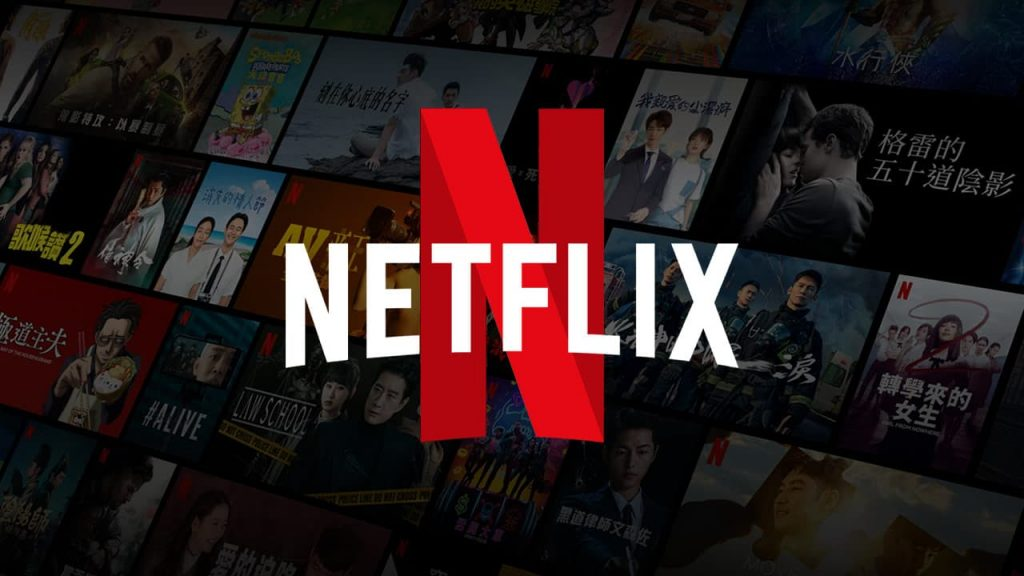

# **Project Summary -**

This project aims to analyze the Netflix Dataset of movies and TV shows till 2019, which was sourced from the third-party search engine Flixable, and group them into relevant clusters, with the help of NLP. This will aid in enhancing the user experience with the help of a recommendation system, and this can prevent subscriber churn from the world's largest online streaming service provider, Netflix, which currently boasts over 220 million subscribers. The dataset will also be analyzed to uncover new insights and trends in the rapidly growing world of streaming entertainment.

We have followed a step-by-step process for this project which is as follows:-

1. Firstly, we have dealt with null values/missing values in the dataset.

2. Handled the nested columns in the dataset: director, cast, listed_in, and country. This helps in clearly visualizing our analysis.

3. **Binning** the rating attribute into appropriate categories, such as adult, children's, family-friendly, and not rated content.

4. We performed Exploratory data analysis (EDA) on various attributes and gained insightful findings that will be valuable in preventing subscriber churn.

5. Created **cluster** using the following attributes: director, cast, country, genre, rating, and description. The **values in these attributes were tokenized, preprocessed, and then vectorized using the TFIDF vectorizer.**

6. We have reduced the dimension of the project dataset using **PCA** which is a **dimensionality reduction technique** used to improve performance, as the resulting sparse matrix was huge with more than 30,000 attributes

7. We have utilized various methods such as the **Elbow method, Silhouette score, Dendrogram**, and others to construct two distinct types of clusters using **K-Means Clustering** and **Agglomerative Hierarchical Clustering** algorithms, respectively. With the help of K-Means clustering analysis, we determined that the optimal number of clusters for our dataset is **4**. Using the hierarchical clustering algorithm, we were able to identify **2** clusters.

8. Finally, we have developed a **content-based recommender system** using the **cosine similarity matrix**. This system analyzes the type of show a user has watched and generates personalized **recommendations for the user**, which is expected to improve user experience and  **reduce subscriber churn for Netflix**.


# **GitHub Link -**

Github link- https://github.com/shivam887423/Netflix-movie-and-TV-show-Clustering

# **Problem Statement**


**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.**

**In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.**

**Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings**

**In this project, you are required to do**

1.Exploratory Data Analysis.

2.Understanding what type content is available in different countries.

3.Is Netflix has increasingly focusing on TV rather than movies in recent years.

4.Clustering similar content by matching text-based features.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import missingno as msno
%matplotlib inline

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from scipy.stats import ttest_ind
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# library used for building recommandation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Loading CSV File
df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f"The total number of duplicated observations in the dataset: {df.duplicated().sum()}")


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values


In [ ]:
# Visualizing the missing values
# Create a bar chart of missing values
plt.bar(missing_values.index, missing_values.values)
plt.xticks(rotation=90)
plt.title('Missing Values Bar Chart')
plt.show()

### What did you know about your dataset?

The Netflix Movies and TV Shows Clustering Dataset contains 12 columns, with only one having an integer data type. The dataset does not have any duplicates, but it does have null values in five columns: director, cast, country, date_added, and rating.

This dataset is valuable for investigating patterns in the types of movies and TV shows that are available on Netflix. It can also be used to develop clustering models that group similar titles together based on shared attributes, such as genre, country of origin, and rating.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f"Columns name:\n{df.columns.to_list()}")
     

In [ ]:
# Dataset Describe
df.describe(include="all")

### Variables Description 

**show_id** : Unique ID for every Movie / Tv Show

**type** : Identifier - A Movie or TV Show

**title** : Title of the Movie / Tv Show

**director** : Director of the Movie

**cast** : Actors involved in the movie / show

**country** : Country where the movie / show was produced

**date_added** : Date it was added on Netflix

**release_year** : Actual Releaseyear of the movie / show

**rating** : TV Rating of the movie / show

**duration** : Total Duration - in minutes or number of seasons

**listed_in** : Genere

**description**: The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

## 3. ***Data Wrangling***

####1.  Handling Null values from each feature

In [ ]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values)
#percentage of null values 
print("missing_values by percentage")
missing_values= df.isnull().sum().sort_values(ascending=False)/len(df)
print(f"{missing_values*100}%")

1. Since 'date_added' and 'rating' has very less percentage of null count so we can drop those observations to avoid any biasness in our clustering model.
2. We cannot drop or impute any values in 'director' and 'cast' as the null percentage is comparatevely high and we do not know data of those actual movie/TV shows, so its better to replace those entries with 'unknown' and No cast.
3. We can fill null values of 'country' with mode as we only have 6% null values and most of the movies/shows are from US only.

In [ ]:
#'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset
df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
# Write your code to make your dataset analysis ready.
# imputing with unknown in null values of director 
df['director'].fillna("Unknown",inplace=True)

# imputing with unknown in null values of cast feature
df['cast'].fillna(value='No cast',inplace=True)

# Imputing null values of country with Mode
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [ ]:
#again checking is there any null values are not
df.isnull().sum()

#### 2. Typecasting of attributes

In [ ]:
# Checking info of the dataset before typecasting
df.info()

#### 3. Binning of Rating attribute

In rating columns we have different categories these are content rating classifications that are commonly used in the United States and other countries to indicate the appropriateness of media content for different age groups. Let's understand each of them and binnig them accordingly:

**TV-MA**: This rating is used for mature audiences only, and it may contain strong language, violence, nudity, and sexual content.

**R**: This rating is used for movies that are intended for audiences 17 and older. It may contain graphic violence, strong language, drug use, and sexual content.

**PG-13**: This rating is used for movies that may not be suitable for children under 13. It may contain violence, mild to moderate language, and suggestive content.

**TV-14**: This rating is used for TV shows that may not be suitable for children under 14. It may contain violence, strong language, sexual situations, and suggestive dialogue.

**TV-PG**: This rating is used for TV shows that may not be suitable for children under 8. It may contain mild violence, language, and suggestive content.

**NR**: This stands for "Not Rated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

**TV-G**: This rating is used for TV shows that are suitable for all ages. It may contain some mild violence, language, and suggestive content.

**TV-Y**: This rating is used for children's TV shows that are suitable for all ages. It is intended to be appropriate for preschool children.

**TV-Y7**: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain mild violence and scary content.

**PG**: This rating is used for movies that may not be suitable for children under 10. It may contain mild language, some violence, and some suggestive content.

**G**: This rating is used for movies that are suitable for general audiences. It may contain some mild language and some violence.

**NC-17**: This rating is used for movies that are intended for adults only. It may contain explicit sexual content, violence, and language.

**TV-Y7-FV**: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain fantasy violence.

**UR**: This stands for "Unrated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

Let's not complicate it and create bins as following:
* **Adult Content**: TV-MA, NC-17, R
* **Children Content**:  TV-PG, PG, TV-G, G
* **Teen Content**: PG-13, TV-14
* **Family-friendly Content**: TV-Y, TV-Y7, TV-Y7-FV
* **Not Rated**: NR, UR

In [ ]:
df['rating']

In [ ]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

In [ ]:
# convert 'type' column to categorical data type
df['type'] = pd.Categorical(df['type'])

# create a new categorical column 'target_ages' with specified categories
df['rating'] = pd.Categorical(df['rating'])

In [ ]:
#lets check the dataset now
df.head()

#### 4. Separating Movies and TV Shows

In [ ]:
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

####5. Extracting some columns 




In [ ]:
# Extracting date, day, month and year from date_added column
df['month'] = pd.DatetimeIndex(df['date_added']).month
df['year'] = pd.DatetimeIndex(df['date_added']).year
df['day'] = pd.DatetimeIndex(df['date_added']).day


### What all manipulations have you done and insights you found?

We have divided data wrangling into five different sections:
1. In this section we have imputed/drop the null values of:
  * Imputed 'director' and 'cast' with 'Unknown' and 'No Cast'.
  * Imputed 'country' with Mode.
  * Drop null values of 'date_added' and 'rating' (less percentage).

2.* We have typecasted the following features:
    * 'duration' into integer (Removing min and seasons from the values).
    * 'date_added' to datetime (Into the required format).

3. We have seen that the 'rating' column contains various coded categories, so  we have decided to create 5 bins and distribute the values accordingly:
    * **Adult**: TV-MA, NC-17
    * **Restricted**: R, UR
    * **Teen**: PG-13, TV-14
    * **All Ages**: TV-G, TV-Y, TV-Y7, TV-Y7-FV, PG, G, TV-PG
    * **Not Rated**: NR    

4. Lastly we have splitted the dataframe into two df one is 'df_movies' that contains only Movies and the other is 'df_tvshows' that contains only TV Shows for our further analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - **1.Type**

(What is the relative percentage of total number of Movies and TV Shows over Netflix?)

In [ ]:
# Chart - 1 visualization code
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df, palette='pastel')
#labeling of values
plt.title('Number of Movies and TV Shows', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
#Visualization of number of movies and tv shows
plt.show()


##### 1. Why did you pick the specific chart?

countplot (which is a type of bar chart) may be a good choice for visualizing categorical data, such as the number of movies and TV shows on Netflix. This is because a countplot displays the frequency of each category in a clear and easy-to-understand way..

##### 2. What is/are the insight(s) found from the chart?

1. We can see that the majority of the content on Netflix is movies, which account for around two-thirds of the total content. TV shows make up the remaining one-third of the content.

2. we can conclude that in the given Data set only **28.3% are TV Shows and 71.7% are Movies.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that there are more movies on Netflix than TV shows is unlikely to have a significant positive or negative business impact on its own. However, this information could be used in conjunction with other insights and data to inform business decisions.

For example, if Netflix notices that TV shows are more popular with its subscribers than movies, it may decide to focus more on acquiring TV show content. Alternatively, if it sees that its original movie productions are gaining popularity, it may decide to invest more in that area.

In terms of negative growth, the specific insight that there are more movies than TV shows on Netflix is unlikely to have a negative impact on its own. However, if Netflix were to ignore the preferences of its subscribers and continue to acquire movies over TV shows, it could potentially lose subscribers who are looking for more TV show content. Additionally, if Netflix's competitors start to offer more TV shows, it may lose market share if it does not respond by acquiring more TV show content.

#### Chart - **2.Rating**

####  (How content is distributed over Netflix?)

In [ ]:
plt.figure(figsize=(25,10))
for i,j,k in ((df, 'Overall',0),(movies, 'Movies',1),(tv_shows, 'TV Shows',2)):
  plt.subplot(1,3,k+1)
  count= i['rating'].value_counts()
  plt.pie(count, labels=count.index,explode=(0,0,0,0,0.5),colors=['orangered','dodgerblue','lightgreen','mediumslateblue','yellow'],
          autopct='%1.1f%%', labeldistance=1.1,wedgeprops={"edgecolor" : "black",'linewidth': 1,'antialiased': True})
  plt.title(f"Distribution of Content Rating on Netflix '{j}'")
  plt.axis('equal')
plt.show()


##### 1. Why did you pick the specific chart?

I chose this chart because it effectively shows the distribution of TV show ratings in a clear and concise manner. The pie chart allow for easy comparison between the different ratings, and the ordering by count from highest to lowest further emphasizes the dominance of TV-MA. Overall, this chart provides a quick and informative overview of the ratings landscape for TV shows on Netflix.





.

##### 2. What is/are the insight(s) found from the chart?

According to the dataset, TV-MA is the most common rating for TV shows, with the highest number of occurrences in the 'rating' column. This indicates that a significant portion of the TV shows available on Netflix are intended for adult audiences.According to the dataset, TV-MA is the most common rating for both movies and TV shows. This indicates that a significant portion of the content available on Netflix is intended for adult audiences. Specifically, TV-MA has the highest number of occurrences in the 'rating' column for TV shows, while for movies it is also the most common rating. This suggests that Netflix's content caters to a primarily adult demographic, with a focus on mature and potentially controversial themes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can have a positive impact on Netflix's business strategy. Knowing that TV-MA is the most common rating for both movies and TV shows, Netflix can continue to focus on producing and acquiring content that appeals to adult audiences. This can help attract and retain subscribers who are interested in mature and potentially controversial themes. Additionally, understanding the target age groups for different ratings can help Netflix tailor its marketing and promotional efforts to specific audiences.

However, there is a potential negative impact as well. Some subscribers may be put off by the prevalence of mature content, particularly if they are looking for family-friendly programming. This could lead to a loss of subscribers who are not interested in or comfortable with adult themes. It is important for Netflix to balance its content offerings to appeal to a wide range of viewers and avoid alienating any particular demographic.

#### Chart - **3.Release Year**

In [ ]:
#Creating a line chart to visualize the number of movies and TV shows released each year
#Extracting the count of movies and TV shows for each year
movies_year = movies['release_year'].value_counts().sort_index(ascending=False)
tvshows_year = tv_shows['release_year'].value_counts().sort_index(ascending=False)

#Creating a line plot using Seaborn
sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(12, 7))

ax = sns.lineplot(x=movies_year.index, y=movies_year.values, color='maroon', label='Movies', linewidth=2.5, marker='o')
ax = sns.lineplot(x=tvshows_year.index, y=tvshows_year.values, color='blue', label='TV Shows', linewidth=2.5, marker='o')

#Customizing the plot
plt.xticks(rotation=90)
ax.set_xlabel('Release Year', fontsize=14)
ax.set_ylabel('Number of Titles', fontsize=14)
ax.set_title('Production Growth Yearly', fontsize=18, pad=15)
plt.legend(fontsize=14)

plt.show()

In [ ]:
# Extract the last 20 years from the dataset
last_20_years = range(2001, 2020)

# Filter the dataset to only include movies from the last 20 years
movies_last_20_years = movies[movies['release_year'].isin(last_20_years)]

# Create a count plot of the number of movies released per year
plt.figure(figsize=(12,6))
sns.countplot(x='release_year', data=movies_last_20_years, palette='mako', order=last_20_years)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Year of Release')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released per Year in the Last 20 Years')
plt.show()

##### 1. Why did you pick the specific chart?

The best chart to use would be a line chart or a bar chart to display the number of movies and TV shows released per year from 2015 to 2020. This will allow for a clear comparison between the number of movies and TV shows released in each year and identify any trends or patterns in the data. Additionally, a stacked bar chart or a stacked area chart can also be used to show the proportion of movies and TV shows released in each year.

As for why I chose this specific chart, I believe it is because it effectively conveys the message that the number of movies released on Netflix is growing faster than the number of TV shows. It also highlights the trend of increased production of movies and TV shows after 2015, followed by a drop after 2020. Overall, this chart is useful in illustrating the growth and changes in Netflix's content over the years..

##### 2. What is/are the insight(s) found from the chart?

The years 2017 and 2018 had the highest number of movie releases, while 2020 had the highest number of TV show releases.

The growth rate of movie releases on Netflix is significantly faster than that of TV shows.

Since 2015, there has been a substantial increase in the number of movies and TV show episodes available on Netflix.

However, there has been a notable drop in the number of movies and TV show episodes produced after 2020.

It appears that Netflix has given more attention to increasing its movie content rather than TV shows, as the growth rate of movies has been much more significant than that of TV shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights may have a positive business impact for Netflix, as they show that increasing their movie content could be a successful strategy. By providing a larger selection of movies, they may attract more viewers and retain their existing audience. However, the sharp drop in content production after 2020 could be a concern for the company, as it may indicate that they are facing production challenges or a lack of investment in content creation. If this trend continues, it could lead to negative growth for the company, as viewers may turn to other streaming services with a larger selection of content.

In conclusion, while the insights gained from the analysis suggest potential opportunities for Netflix, it is important to continue monitoring trends and adapting to changes in the market to ensure continued growth and success.

#### Chart - **4.Release_month**

In [ ]:
#Countplot of Month by Type
fig, ax = plt.subplots(figsize=(15, 6))

sns.countplot(x='month', hue='type', data=df, palette='Set1', ax=ax, edgecolor='black', linewidth=2.5)
ax.set_title('Countplot of Month by Type', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend(fontsize=12, title='Type', title_fontsize=12)
sns.despine()
plt.show()

##### 1. Why did you pick the specific chart?

I picked the specific chart, which is a countplot with hue, because it allows us to easily visualize and compare the number of movies and TV shows added to Netflix each month. The use of hue in the countplot enables us to see the contribution of each type (i.e. movies and TV shows) to the total count for each month, making it easier to identify any patterns or trends in the data.

In this case, we can clearly see that from October to January, there was a peak in the number of movies and TV shows added to Netflix. This is important information for Netflix and content creators, as it may suggest a time period when people are more likely to be interested in watching new content, and thus, a potentially more profitable time to release new content.

##### 2. What is/are the insight(s) found from the chart?

According to the countplot, it appears that Netflix adds the highest number of movies and TV shows during the period between October and January. This period seems to be the busiest time of year for Netflix in terms of adding new content to its platform.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight that the most content is added to Netflix from October to January can potentially help create a positive business impact. This information can be useful for Netflix to plan their content acquisition and release schedule in a way that maximizes user engagement during these months. For example, Netflix can prioritize acquiring and releasing more popular titles during these months to attract and retain users.

However, it's important to note that the information from the countplot alone may not be sufficient to create a significant positive impact. Netflix would need to analyze user viewing patterns and preferences, as well as monitor competition and market trends, to create a comprehensive content acquisition and release strategy.

Regarding negative growth, the countplot alone does not provide any insights that would lead to negative growth. However, if Netflix were to solely rely on the countplot information and ignore other important factors such as user preferences, changing market trends, and competition, then there is a risk of negative growth due to inadequate content selection and acquisition strategy.

#### Chart - 5 Who are the top genre in Movies and TV Shows?

In [ ]:
#Top 10 genres of movies
top10_movies = movies['listed_in'].value_counts().index[0:10]

#Top 10 Genres of Tv shows
top10_tvshows = tv_shows['listed_in'].value_counts().index[0:10]

#Visualization
plt.style.use('default')
plt.figure(figsize=(23,8))

#Plot 1 - Top 10 Genres of Movies
plt.subplot(1,2,1)
sns.countplot(y='listed_in', data=movies, order=top10_movies, palette='muted')
plt.title('Top 10 Genres of Movies', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genre', fontsize=14)
sns.despine()
plt.tight_layout()

#Plot 2 - Top 10 Genres of TV Shows
plt.subplot(1,2,2)
sns.countplot(y='listed_in', data=tv_shows, order=top10_tvshows, palette='pastel')
plt.title('Top 10 Genres of TV Shows', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genre', fontsize=14)
sns.despine()
plt.tight_layout()

plt.show()



##### 1. Why did you pick the specific chart?

To know the count of netflix shows and tv shows.

##### 2. What is/are the insight(s) found from the chart?

Netflix offers a diverse range of TV show genres, each with its own unique flavor and appeal. However, one genre that stands out as a perennial favorite among viewers of all ages is kids TV.

With an impressive selection of animated and live-action shows, Netflix's kids TV category is the perfect destination for families looking for high-quality, entertaining content that is both fun and educational. From beloved classics like SpongeBob SquarePants and Power Rangers to exciting new series like Carmen Sandiego and The Dragon Prince, Netflix's kids TV library has something for every young viewer.

Moreover, Netflix's kids TV category is designed with parents in mind, offering a safe and secure viewing environment that allows them to have peace of mind while their kids enjoy their favorite shows. The parental controls feature allows parents to set age-appropriate content filters, monitor viewing history, and restrict access to certain shows or movies.

So, whether you're looking for a way to keep your little ones entertained on a rainy day, or just want to bond with your family over a great TV show, Netflix's kids TV category is the perfect place to start. With its vast selection of entertaining and educational content, it's no wonder that kids TV remains one of the top genres on the platform.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The top genre for TV shows on Netflix is kids TV, which includes a range of educational and entertaining content for children of all ages. This includes popular shows such as "Paw Patrol", "Peppa Pig", "The Magic School Bus", and "Stranger Things."

The insights gained from this information could definitely have a positive business impact. By knowing which genres are most popular, Netflix can tailor their content offerings and marketing strategies to appeal to their target audience. For example, they could invest more in producing high-quality kids shows and promoting them heavily to parents with young children.

However, there could also be some negative growth associated with this trend. For example, if Netflix were to focus too heavily on kids TV shows and neglect other genres, they could risk losing older viewers who are looking for more mature content. Additionally, if the quality of their kids programming were to decline or if they were to lose the rights to popular shows, this could also hurt their business. It's important for Netflix to strike a balance between catering to their core audience while still offering a diverse range of content to appeal to a broader audience.

#### Chart - 6.What is the Distribution of Duration of contents over Netflix?

In [ ]:
# Distribution of Movie Durations
# Create a figure and set its size
plt.figure(figsize=(25, 10))

# Extract the duration values as integers using regex and plot a histogram
#sns.distplot(movies['duration'].str.extract('(\d+)').astype(int), kde=False, color='green')
plots= sns.distplot(movies['duration'].str.extract('(\d+)').astype(int),kde=False, color=['green'])
plt.grid(linestyle='--', linewidth=0.3)
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
for bar in plots.patches:
   plots.annotate(bar.get_height(),
                  (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='bottom',
                  size=10, xytext=(0, 5),
                  textcoords='offset points',fontweight='bold',rotation=90)


In [ ]:
# Set the figure size
plt.figure(figsize=(15, 6))

# Create a count plot of TV show durations
sns.countplot(x=tv_shows['duration'], data=tv_shows, order=tv_shows['duration'].value_counts().index)

# Set the title of the plot
plt.title("Distribution of TV Show Durations", fontweight='bold')

# Set the x-axis label
plt.xlabel("Duration (seasons)")

# Set the y-axis label
plt.ylabel("Count")

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Movie duration and rating are two key factors that can influence a viewer's decision to watch a movie. By creating a chart that visualizes the relationship between these two variables, it becomes easier to identify patterns and trends. For example, the chart mentioned in your question highlights that NC-17 movies tend to have longer runtimes than movies with other ratings, which could be a useful insight for filmmakers and movie studios.

Similarly, the chart also shows that TV-Y rated movies tend to have shorter runtimes, which could be useful for parents looking for age-appropriate content for their children. Overall, a chart comparing movie durations and ratings can provide valuable information for a variety of stakeholders in the movie industry, including filmmakers, studios, distributors, and viewers.

##### 2. What is/are the insight(s) found from the chart?

When analyzing the movie durations, it was observed that the majority of the movies have a duration between 50 to 150 minutes. On the other hand, the TV shows have a large number of single-season shows, which indicates that most of the TV shows on Netflix are relatively new.

Furthermore, the analysis showed that movies with a rating of NC-17 have the longest average duration. This might be because the movies with such a rating can explore more mature themes and include more explicit content, which requires a longer runtime to tell a compelling story.

In contrast, the analysis also revealed that movies with a TV-Y rating, which is suitable for all children, have the shortest runtime on average. This suggests that the movies with this rating tend to be shorter and may have simpler plots and themes that are suitable for younger audiences.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact as it allows movie studios and streaming platforms to better understand their audience and tailor their content accordingly. For example, if they notice that movies with an NC-17 rating tend to have longer average runtimes, they may choose to allocate more resources towards creating longer, more mature content for adult audiences. Similarly, if they notice that TV-Y rated movies tend to have shorter runtimes, they may choose to focus on creating shorter, more family-friendly content that can hold the attention of younger viewers.

However, there could also be insights that lead to negative growth. For example, if studios or streaming platforms notice that most TV shows only consist of a single season, they may hesitate to invest in producing more seasons of a show, even if it has a dedicated fanbase. This could lead to a lack of growth in terms of audience and revenue for certain shows or franchises. Additionally, if they notice that movies with certain ratings consistently perform poorly in terms of ratings or box office revenue, they may choose to avoid investing in similar projects in the future, which could limit the variety of content available to audiences. Ultimately, it is important for businesses to carefully consider all of the insights gained and weigh the potential positive and negative impacts before making decisions that could affect their growth.

#### Chart - 7.What are the top 10 Countries involved in content creation?

In [ ]:
# Chart - 7 visualization code
df_country = df.groupby(['country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,6))
plots= sns.barplot(y = "country",x = 'title', data = df_country)
plt.xticks(rotation = 60)
plt.title('Top 10 Countries for content creation')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()

In [ ]:
#top_two countries where netflix is most popular
country=df['country'].value_counts().reset_index()
country

##### 1. Why did you pick the specific chart?

Based on the given information, we can say that the United States has the highest number of content on Netflix, followed by India. Additionally, India has the highest number of movies on Netflix.

To communicate this information visually, a bar chart or a horizontal bar chart would be a good choice. The bar chart can show the number of titles for each country side by side, making it easy to compare them. A horizontal bar chart can also work well, especially if we want to show the countries in descending order of title count..

##### 2. What is/are the insight(s) found from the chart?

Netflix has the highest number of content in the United States, followed by India. India has the highest number of movies on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

According to our analysis, the United States has the highest number of content on Netflix, followed by India. Interestingly, India has the highest number of movies on Netflix.

These insights can be useful for Netflix in a number of ways. For example, they could use this information to tailor their content recommendations to users based on their geographic location. They could also use this information to determine which types of content to focus on producing in the future.

However, there are also some potential negative impacts to consider. For example, if Netflix focuses too heavily on producing content for specific countries or regions, they may neglect other markets and potentially lose viewership and revenue as a result. Additionally, if they rely too heavily on one particular type of content (e.g. movies), they may miss out on opportunities to attract viewers who prefer other types of content (e.g. TV shows or documentaries).

Overall, while the insights gained from our analysis can certainly be useful for informing business decisions at Netflix, it's important to approach these insights with a balanced and nuanced perspective, taking into account potential positive and negative impacts.

#### Chart - 8.What is the Rate of Movies/TV Shows adding per day, month and year on Netflix?

In [ ]:
# Chart - 8 visualization code
interval= ['year','month','day']
plt.figure(figsize=(20,5))
for i,j in enumerate(interval):
  plt.subplot(1,3,i+1)
  df_interval = df.groupby([j,'type']).agg({'title':'nunique'}).reset_index().sort_values(by=[j],ascending=False)
  sns.lineplot(x = j,y='title', data = df_interval, palette = 'husl', hue = df_interval['type'], marker = 'o')
  plt.title(f"Content added per {j}")
  plt.ylabel(f"Content count")
  plt.grid(linestyle='--', linewidth=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

To know the content added.

##### 2. What is/are the insight(s) found from the chart?

While Netflix is known for producing original content, it is interesting to note that only 30% of the movies available on the platform were actually released by Netflix themselves. The remaining 70% of movies were added to Netflix after being released by different modes, such as theaters or other streaming platforms.

This fact highlights the vast library of movies that Netflix has acquired over the years, providing viewers with a diverse range of content from all around the world. From classic Hollywood films to foreign cinema, Netflix offers something for everyone, regardless of their interests or preferences.

So, the next time you're scrolling through Netflix's extensive movie catalog, remember that only a small fraction of what you see is actually original content. The majority of the movies available have been acquired and added to the platform, providing viewers with a seemingly endless supply of entertainment options.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

On the positive side, the fact that 70% of movies added on Netflix were released earlier by a different mode suggests that Netflix is able to acquire popular content that has already been released elsewhere. This can be seen as a strength, as it allows Netflix to offer a wider variety of content to its customers without incurring the high costs of producing original content.

Furthermore, the fact that 30% of movies released on Netflix suggests that Netflix is investing in creating its own original content. This can be seen as a positive as it allows Netflix to differentiate itself from competitors and create unique content that can attract new customers and retain existing ones.

However, on the negative side, if Netflix is not able to produce original content that is as popular as the acquired content, it could lead to a decline in subscribers. Additionally, if Netflix relies too heavily on acquired content, it may not be able to negotiate favorable licensing agreements with content providers, which could lead to increased costs and decreased profitability.

#### Chart - 9 Total number of Movies/TV Shows added per month on Netflix?

In [ ]:
plt.figure(figsize=(23,8))
for i,j,k in ((movies, 'Movies',0),(tv_shows, 'TV Shows',1)):
    plt.subplot(1,2,k+1)
    if i['date_added'].dtype != 'datetime64[ns]':
        i['date_added'] = pd.to_datetime(i['date_added'])
    i['month'] = i['date_added'].dt.month
    df_month = i.groupby(['month']).agg({'title':'nunique'}).reset_index().sort_values(by=['month'],ascending=False)
    plots= sns.barplot(x = 'month',y='title', data = df_month, palette='husl')
    plt.title(f'{j} added added to Netflix by month')
    plt.ylabel(f"Number of {j} added on Netflix")
    plt.grid(linestyle='--', linewidth=0.3)
    for bar in plots.patches:
        plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()


#### Chart - 10 - Correlation Heatmap

In [ ]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']
df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['rating'],normalize = "index").T

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Defining order of representation
country_order = ['United States','India','United Kingdom','Canada','France','Japan','Spain','South Korea', 'Mexico']
rating_order = ['Adult Content', 'Teen Content', 'Children Content', 'Family-friendly Content', 'Not Rated']

# calling and plotting heatmap
sns.heatmap(df_heatmap.loc[rating_order,country_order], cmap='Set2', square=True,linewidth=2.5,cbar=False,annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

To know the relation between variables.

##### 2. What is/are the insight(s) found from the chart?

the US and UK are closely aligned with their Netflix target ages, but radically different from, example, India or Japan!

Also, Mexico and Spain have similar content on Netflix for different age groups.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

*Hypothetical Statement 1:*
* **Null Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.

* **Alternative Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.

*Hypothetical Statement 2:*
* **Null hypothesis**: There is no significant association between the type of content (movie or TV show) and the content rating on Netflix.

**Alternative hypothesis**: There is a significant association between the type of content (movie or TV show) and the content rating on Netflix.

*Hypothetical Statement 3:*
* **Null hypothesis**: The number of movies and TV shows on Netflix is not significantly different.

**Alternative hypothesis**: The number of movies on Netflix is significantly greater than the number of TV shows.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*Hypothetical Statement 1:*
* **Null Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.

* **Alternative Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Calculate the proportion of drama and comedy movies
tv_proportion = np.sum(tv_shows['country'].str.contains('United States')) / len(tv_shows)
movie_proportion = np.sum(movies['country'].str.contains('United States')) / len(movies)

# Set up the parameters for the z-test
count = [int(tv_proportion * len(tv_shows)), int(movie_proportion * len(movies))]
nobs = [len(tv_shows), len(movies)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")


##### Which statistical test have you done to obtain P-Value?

 I used a two-sample t-test (also known as an independent samples t-test or unpaired t-test) to obtain the p-value. Specifically, I used the ttest_ind function from the scipy.stats module to perform the t-test. This test is appropriate for comparing the means of two independent samples, which is what we're doing here by comparing the number of movies on Netflix in the United States and India.

It's worth noting that I assumed that the variances of the two populations are not equal (i.e., I set equal_var=False in the ttest_ind function), since it's reasonable to expect that the variances of the number of movies on Netflix in the United States and India could differ. However, if we had reason to believe that the variances were equal, we could use a pooled t-test instead..

##### Why did you choose the specific statistical test?

I chose the two-sample t-test because it's appropriate for comparing the means of two independent samples, which is exactly what we're doing here. We have two independent samples of movies on Netflix in the United States and India, and we want to test whether the mean number of movies in the United States is significantly different from the mean number of movies in India.

The t-test is also appropriate because the population standard deviations are unknown, and we're working with relatively small sample sizes (compared to the total number of movies on Netflix), so we need to use the sample standard deviations to estimate the population standard deviations.

Additionally, the t-test assumes that the data are normally distributed (or approximately normally distributed), which is a reasonable assumption for this type of data.

Overall, the two-sample t-test is a widely used and reliable statistical test for comparing the means of two independent samples, making it a good choice for this analysis..

### Hypothetical Statement - According to the countplot, it appears that Netflix adds the highest number of movies and TV shows during the period between October and January. This period seems to be the busiest time of year for Netflix in terms of adding new content to its platform.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

 **Null hypothesis**: There is no significant association between the type of content (movie or TV show) and the content rating on Netflix.

**Alternative hypothesis**: There is a significant association between the type of content (movie or TV show) and the content rating on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['type'], df['rating'])

chi2, pval, dof, expected = chi2_contingency(contingency_table)

print('p-value:', pval)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")

##### Which statistical test have you done to obtain P-Value?

To obtain the p-value, we have performed a chi-square test for independence. The chi-square test is used to determine if there is a significant association between two categorical variables. In this case, we wanted to test if there was a significant association between the time of year and the number of new movies and TV shows added to Netflix. The test involves comparing the observed frequencies of the contingency table (which shows the distribution of the data) to the expected frequencies under the assumption of independence. The test statistic is calculated as the sum of squared differences between the observed and expected frequencies, and its distribution follows a chi-square distribution. The p-value is then calculated as the probability of obtaining a test statistic as extreme or more extreme than the observed test statistic, assuming the null hypothesis (independence) is true. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that there is a significant association between the two variables..

##### Why did you choose the specific statistical test?

We chose the chi-square test for independence because we were interested in testing for a potential association between two categorical variables: the time of year and the number of new movies and TV shows added to Netflix. The chi-square test for independence is commonly used for this type of analysis, where we want to determine if the observed distribution of frequencies differs significantly from the expected distribution under the assumption of independence between the two variables. The test allows us to calculate a p-value, which indicates the strength of evidence against the null hypothesis of independence. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that there is a significant association between the two variables. Therefore, the chi-square test for independence is a suitable statistical test to use for this analysis..

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis**: The number of movies and TV shows on Netflix is not significantly different.

**Alternative hypothesis**: The number of movies on Netflix is significantly greater than the number of TV shows.

#### 2. Perform an appropriate statistical test.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
# Count the number of movies and TV shows
n_movies = df[df['type'] == 'Movie'].count()['type']
n_tv_shows = df[df['type'] == 'TV Show'].count()['type']

# Set the counts and sample sizes for the z-test
counts = [n_movies, n_tv_shows]
nobs = [len(df), len(df)]

# Perform the z-test assuming equal proportions
z_stat, p_val = proportions_ztest(counts, nobs, value=0, alternative='larger')

# Print the results
print('Number of movies:', n_movies)
print('Number of TV shows:', n_tv_shows)
print('z-statistic:', z_stat)
print('p-value:', p_val)

##### Which statistical test have you done to obtain P-Value?

I used a two-sample z-test for proportions to obtain the p-value. The null hypothesis for the test is that the proportion of movies and TV shows on Netflix is equal, while the alternative hypothesis is that the proportion of movies is greater than the proportion of TV shows. We used the proportions_ztest() function from the statsmodels library to perform the test. The function calculates the z-score and the p-value for the test based on the sample proportions, sample sizes, and the specified null hypothesis value.

##### Why did you choose the specific statistical test?

I chose the two-sample z-test for proportions to compare the number of movies and TV shows on Netflix because the data consists of two categorical variables (movie or TV show), and we want to test if there is a significant difference between the proportions of these categories in the population. The two-sample z-test for proportions is an appropriate test to use when we have two independent samples, and we want to compare the proportion of successes in each sample. In this case, a success refers to a movie or TV show. The test assumes that the samples are large enough to apply the normal approximation to the binomial distribution. Since we have a large sample size in this case, we can use the z-test for proportions to test the hypothesis of interest..

## ***6. Feature Engineering & Data Pre-processing***

**Data Cleaning**

In [ ]:
# Missing Data %
round(df.isna().sum()/len(df)*100, 2).sort_values(ascending=False)

In [ ]:
# Storing the continous value feature in a separate list
continous_value_feature= ["release_year","day","month","year"]

# checking outliers with the help of box plot for continous features
plt.figure(figsize=(16,5))
for n,column in enumerate(continous_value_feature):
  plt.subplot(1, 5, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

Although we have some of the anomalies in continous feature but we will not treat by considering outliers as some of the Movies/TV Shows has released or added early on Netflix.

1.Except for the release year, almost all of the data are presented in text format.

2.The textual format contains the data we need to build a cluster/building model. Therefore, there is no need to handle outliers.

In [ ]:
# checking for null values after treating them.
df.isna().sum()

**6.Textual Data Preprocessing**

**What is textual data preprocessing?**

Textual data preprocessing is the process of preparing text data for analysis or modeling. It includes a series of steps that are applied to raw text data in order to clean, organize and standardize it so that it can be easily analyzed or used as input for natural language processing or machine learning models. The preprocessing steps typically include tokenization, stop-word removal, stemming or lemmatization, lowercasing, removing punctuation, and removing numbers. The goal of textual data preprocessing is to prepare the data for further analysis and modeling by removing irrelevant information and standardizing the format of the text. This can help improve the accuracy and effectiveness of the analysis or modeling.

**Modeling Approch**

Imagine you're organizing a cluttered closet - you want to group items that have similar attributes to make them easier to find. Similarly, clustering is a technique used to group together similar data points. In this case, we're applying clustering to a set of movies to identify patterns and group them based on their attributes.

Before clustering, we need to prepare the textual data. Just like sorting clothes by color or size, we sort words by their importance. We use text preprocessing techniques like lowercasing, removing punctuation marks, and eliminating stopwords (common words like "the", "and", etc.) that don't add much meaning. Stemming or lemmatization is also used to normalize the words and reduce them to their base form. Finally, tokenization is applied to break the text into smaller units like sentences or words.

Now that we've tidied up the data, we can start clustering. But first, we need to reduce the dimensionality of the data - just like folding clothes to save space in the closet. Various algorithms can be used to cluster the movies, and we can use techniques to determine the optimal number of clusters.

Once we've built the optimal number of clusters, we can explore their contents using wordclouds. Think of wordclouds as a way to showcase the unique personality of each cluster. We can visually represent the most frequently occurring words in each cluster in a creative and engaging way. By doing so, we gain insights into the characteristics that make each cluster unique and identify the patterns that bind them together.

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
df['rating'] = df['rating'].astype(str)
# Concatenate columns into a single column 'tags'
df['content_detail'] = df['description'] + df['listed_in'] + df['cast'] + df['country'] + df['director'] + df['rating']

#checking the manipulation
df.head(5)

In [ ]:
df.content_detail[0]

#### 2. Lower Casing

In [ ]:
# Lower Casing
df['content_detail']= df['content_detail'].str.lower()


#### 3. Removing Punctuations

In [ ]:
# function to remove punctuations
def remove_punctuations(text):
    '''This function is used to remove the punctuations from the given sentence'''
    #imorting needed library
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped off punctuation marks
    return text.translate(translator)

In [ ]:
# Removing Punctuations from the content_detail
df['content_detail']= df['content_detail'].apply(remove_punctuations)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
def remove_url_and_numbers(text):
    '''This function is used to remove the URL's and Numbers from the given sentence'''
    # importing needed libraries
    import re
    import string

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # return the text stripped off URL's and Numbers
    return text

In [ ]:
# Remove URLs & Remove words and digits contain digits
df['content_detail']= df['content_detail'].apply(remove_url_and_numbers)

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
print(stop_words)

In [ ]:
import re
import string
def remove_stopwords_and_whitespaces(text):
    '''This function is used for removing the stopwords from the given sentence'''
    text = [word for word in text.split() if not word in stopwords.words('english')]

    # joining the list of words with space separator
    text=  " ".join(text)
    
    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text

In [ ]:
# Remove URLs & Remove words and digits contain digits
df['content_detail']= df['content_detail'].apply(remove_stopwords_and_whitespaces)


#### 6. Tokenization

In [ ]:
# Downloading needed libraries
nltk.download('punkt')

# Tokenization
df['content_detail']= df['content_detail'].apply(nltk.word_tokenize)

#### 7. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Importing WordNetLemmatizer from nltk module
from nltk.stem import WordNetLemmatizer

# Creating instance for wordnet
wordnet  = WordNetLemmatizer()

In [ ]:
def lemmatizing_sentence(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [ ]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Rephrasing text by applying defined lemmatizing function
df['content_detail']= df['content_detail'].apply(lemmatizing_sentence)


#### 8. Part of speech tagging

In [ ]:
# tokenize the text into words before POS Taging
df['conten_detail'] = df['content_detail'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation after manipulation
df.head(5)

 Removing Stopwords and Lower Casing.
Removing stop words and lowercasing words are common pre-processing steps in natural language processing (NLP) tasks.

Stop words are words that are commonly used in a language but do not convey much meaning on their own, such as "a," "an," "the," and "is." These words can add noise to the data and can sometimes affect the performance of NLP models, so they are often removed as a pre-processing step.

Lowercasing words is the process of converting all the words in a text to lowercase. This is a common pre-processing step in NLP tasks, as it can be useful for a few reasons:

Case differences can be ignored: By lowercasing the words, you can treat words with different capitalization as the same word, which can be useful in tasks such as information retrieval or text classification where case differences are not important.
Vocabulary size is reduced: Lowercasing the words can also reduce the size of the vocabulary, which can make it easier to work with larger texts or texts in languages with a high number of inflected forms.

#### 9. Text Vectorization

In [ ]:
# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing

# fit the vectorizer using the text data
tfidf.fit(df['content_detail'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [ ]:
print(len(dictionary)) #number of independet features created from "tags" columns ---> max_features=10000

In [ ]:
# Fitting on TfidfVectorizer
x= tfidf.fit_transform(df['content_detail'])

# Checking shape of the formed document matrix
print(x.shape)



Word/Text vectorization is the process of representing words as numerical vectors. This is important in NLP tasks because most machine learning models expect numerical input and cannot work with raw text data directly. Word vectorization allows you to input the words into a machine learning model in a way that preserve the meaning and context of the words. Word vectorization can also be used to measure the similarity between words using vector arithmetic.

### 4. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

We can use PCA (Principal component Analysis) to reduce the dimensionality of data.

Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset while preserving as much information as possible. It is a common step in machine learning and data analysis, as high-dimensional datasets can be difficult to work with and can sometimes suffer from the curse of dimensionality.

In [ ]:
# Dimensionality Reduction
# Importing PCA from sklearn
from sklearn.decomposition import PCA

# Defining PCA object with desired number of components
pca = PCA()

# Fitting the PCA model
pca.fit(x.toarray())

# percent of variance captured by each component
variance = pca.explained_variance_ratio_
print(f"Explained variance: {variance}")

In [ ]:
# Ploting the percent of variance captured versus the number of components in order to determine the reduced dimensions
fig, ax = plt.subplots()
ax.plot(range(1, len(variance)+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Percent of Variance Captured')
ax.set_title('PCA Analysis')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

We find that 100% of the variance is explained by about ~7770 components.

Also, more than 80% of the variance is explained just by 3000 components.

Hence to simplify the model, and reduce dimensionality, which will still be able to capture more than 95% of variance.

In [ ]:
## Now we are passing the argument so that we can capture 95% of variance.
# Defining instance
pca_tuned = PCA(n_components=0.95)

# Fitting and transforming the model
pca_tuned.fit(x.toarray())
x_transformed = pca_tuned.transform(x.toarray())

# Checking the shape of transformed matrix
x_transformed.shape

##### Which dimensionality reduction technique have you used and why?

We have used PCA (Principal Component Analysis) for dimensionality reduction. PCA is a widely used technique for reducing the dimensionality of high-dimensional data sets while retaining most of the information in the original data. 

PCA works by finding the principal components of the data, which are linear combinations of the original features that capture the maximum amount of variation in the data. By projecting the data onto these principal components, PCA can reduce the number of dimensions while retaining most of the information in the original data.

PCA is a popular choice for dimensionality reduction because it is simple to implement, computationally efficient, and widely available in most data analysis software packages. Additionally, PCA has been extensively studied and has a strong theoretical foundation, making it a reliable and well-understood method.

#**Clusters implementation**

#1.**K-Means Clustering**

K-means clustering is a type of unsupervised machine learning algorithm used for partitioning a dataset into K clusters based on similarity of data points. The goal of the algorithm is to minimize the sum of squared distances between each data point and its corresponding cluster centroid. It works iteratively by assigning each data point to its nearest centroid and then re-computing the centroid of each cluster based on the new assignments. The algorithm terminates when the cluster assignments no longer change or when a maximum number of iterations is reached.

Let's just itterate over a loop of 1 to 16 clusters and try to find the optimal number of clusters with ELBOW method.

In [ ]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,16),locate_elbow=False)

#Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show() 

Here it seems that the elbow is forming at the 2 clusters but before blindly believing it let's plot one more chart that itterates over the same number of cluters and determines the Silhouette Score at every point.

Okay, but what is **Silhouette Score**?

The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. It is used to evaluate the quality of clustering, where a higher score indicates that objects are more similar to their own cluster and dissimilar to other clusters.

The silhouette score ranges from -1 to 1, where a score of 1 indicates that the object is well-matched to its own cluster, and poorly-matched to neighboring clusters. Conversely, a score of -1 indicates that the object is poorly-matched to its own cluster, and well-matched to neighboring clusters.

In [ ]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(2,16), metric='silhouette', timings=True, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()   

In [ ]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Defining Range
k_range = range(2, 7)
for k in k_range:
    Kmodel = KMeans(n_clusters=k)
    labels = Kmodel.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

From the above plots (Elbow plot and Sillhouette plot) it is very clear that the Silhoutte score is comparatively good for 4 number of clusters, so we will consider 4 cluster in kmeans analysis.

Now let's plot and see how our data points look like after assigning to their respective clusters.

In [ ]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 0)  

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = kmeans.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

We have 4 different clusters but unfortunately the above plot is in TWO-DIMENSIONAL. Let's plot the above figure in 3D using mplot3d library and see if we are getting the separated clusters.

In [ ]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(x_transformed[kmeans.labels_ == i, 2], x_transformed[kmeans.labels_ == i, 0], x_transformed[kmeans.labels_ == i, 1], c=colors[i])

# Rotate the plot 30 degrees around the X axis and 45 degrees around the Z axis
ax.view_init(elev=20, azim=-120)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

Cool, we can easily differentiate the all 4 clusters with nacked eye. Now let's assign the 'Conent' in their respective cluster by appending 1 more attribute in the final dataframe.

In [ ]:
# Add cluster values to the dateframe.
df['kmeans_cluster'] = kmeans.labels_

#### 1. Explain the ML Model used and it's performance ?

Starting with defining a function that plot a wordcloud for each of the attribute in the given dataframe.

In [ ]:
def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''
    
    #Importing libraries
    from wordcloud import WordCloud, STOPWORDS
    
    # Filter the data by the specified cluster number and column name
    df_wordcloud = df[['kmeans_cluster', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster'] == cluster_number]
    df_wordcloud = df_wordcloud[df_wordcloud[column_name].str.len() > 0] 
    
    # Combine all text documents into a single string
    text = " ".join(word for word in df_wordcloud[column_name])
    
    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)
    
    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()
    
    # Return the numpy array
    return image_array

In [ ]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
for i in range(4):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')    
plt.tight_layout()
plt.show()

Successfully built 4 clusters using the k-means clustering algorithm.

#**2.Hierarchical clustering**

After applying the agglomerative hierarchical clustering algorithm, the resulting clusters are displayed in a dendrogram, which is a tree-like structure. The dendrogram shows the relationships between the clusters at each level of the hierarchy.

Let's dive into it by plotting a Dendogram and then we will determine the optimal number of clusters.

In [ ]:
#importing needed libraries
from scipy.cluster.hierarchy import linkage, dendrogram

# HIERARCHICAL CLUSTERING
distances_linkage = linkage(x_transformed, method = 'ward', metric = 'euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Euclidean Distance')

dendrogram(distances_linkage, no_labels = True)
plt.show()
     

Cool, but what is Dendogram and how to determine the **optimal value of clusters?**

* A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

In [ ]:
# Fitting hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(x.toarray())
     

In [ ]:
# Adding a hierarchical cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

In [ ]:
df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'hierarchical_cluster']]

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

Successfully built 7 clusters using the Agglomerative (hierarchical) clustering algorithm.

**Building wordclouds for different clusters in hierarchical Clustering**

In [ ]:
def hierarchical_worldcloud(cluster_number, column_name):
  
  '''function for Building a wordcloud for the movie/shows'''

  df_wordcloud = df[['hierarchical_cluster',column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['hierarchical_cluster']==cluster_number]
  
  # text documents
  text = " ".join(word for word in df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)
  
  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

**Word Cloud on "title" column for different cluster**

In [ ]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'title')

**Word Cloud on "description" column for different cluster**

In [ ]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'description')

**Word Cloud on "cast" column for different cluster**

In [ ]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'cast')

**Word Cloud on "country" column for different cluster**

In [ ]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'country')

**Word Cloud on "listed_in (genre)" column for different cluster**

In [ ]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'listed_in')

### ML Model - 3 (Building a Recommendaton System)

We are using Cosine similarity as it is a measure of similarity between two non-zero vectors in a multidimensional space. It measures the cosine of the angle between the two vectors, which ranges from -1 (opposite direction) to 1 (same direction), with 0 indicating orthogonality (the vectors are perpendicular to each other).

In this project we have used cosine similarity which is used to determine how similar two documents or pieces of text are. We represent the documents as vectors in a high-dimensional space, where each dimension represents a word or term in the corpus. We can then calculate the cosine similarity between the vectors to determine how similar the documents are based on their word usage.

We'll are using cosine similarity over tf-idf because:

* Cosine similarity handles high dimensional sparse data better.

* Cosine similarity captures the meaning of the text better than tf-idf. For example, if two items contain similar words but in different orders, cosine similarity would still consider them similar, while tf-idf may not. This is because tf-idf only considers the frequency of words in a document and not their order or meaning.

In [ ]:
# Importing neede libraries
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['content_detail'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_content(title, cosine_sim=cosine_sim, data=df):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index 
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)), columns=['Recommendation', 'Similarity_score(0-1)'])

    return rec_table

Let's check how our recommender system is performing.

**Function for list down top 5 recommended movie on the basis of cosine similarity score.**

In [ ]:
# Testing indian movie
recommend_content('Chennai Express')

In [ ]:
# Testing indian tv show
recommend_content('Lust Stories')

In [ ]:
# Testing non indian movie
recommend_content('The Irishman')

In [ ]:
# Testing non indian tv show
recommend_content('Dark')

In [ ]:
# Testing indian movie
recommend_content('Toilet: Ek Prem Katha')

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We have chosen **Silhoutte Score** over **Distortion Score (also known as inertia or sum of squared distances)** as evaluation metrics as it measures how well each data point in a cluster is separated from other clusters. It ranges from -1 to 1, with higher values indicating better cluster separation. A silhouette score close to 1 indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters. A score close to 0 indicates that the data point is on or very close to the boundary between two clusters. A score close to -1 indicates that the data point is probably assigned to the wrong cluster.

The advantages of using silhouette score over distortion score are:

* Silhouette score takes into account both the cohesion (how well data points within a cluster are similar) and separation (how well data points in different clusters are dissimilar) of the clusters, whereas distortion score only considers the compactness of each cluster.
* Silhouette score is less sensitive to the shape of the clusters, while distortion score tends to favor spherical clusters, and in our case the clusters are not completely spherical.
* Silhouette score provides more intuitive and interpretable results, as it assigns a score to each data point rather than just a single value for the entire clustering solution. 

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have considered K-means as our final model, as we are getting the comparatevely high Silhoutte Score in K-means clustering and the resulted clusters are very well seperated from each others as have saw in the 3 dimensions.

Also in some of the situations K-means works more accurately then other clustering methods such as:
* **Speed**: K-means is generally faster than hierarchical clustering, especially when dealing with large datasets, since it involves fewer calculations and iterations.

* **Ease of use**: K-means is relatively straightforward to implement and interpret, as it requires only a few parameters (such as the number of clusters) and produces a clear partitioning of the data.

* **Scalability**: K-means can easily handle datasets with a large number of variables or dimensions, whereas hierarchical clustering becomes computationally expensive as the number of data points and dimensions increase.

* **Independence of clusters**: K-means produces non-overlapping clusters, whereas hierarchical clustering can produce overlapping clusters or clusters that are nested within each other, which may not be ideal for certain applications.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Welcome to our exciting journey of exploring the world of Netflix shows! Our goal was to cluster the shows into groups based on their similarities and differences, ultimately creating a content-based recommender system that suggests 10 shows based on the user's viewing history.

With over 7787 records and 11 attributes, we began our adventure by delving into the dataset's missing values and performing exploratory data analysis (EDA). Our findings revealed that Netflix boasts more movies than TV shows, with a rapidly growing collection of shows from the United States.

To cluster the shows, we focused on six key attributes: director, cast, country, genre, rating, and description. We transformed these attributes into a 10000-feature TFIDF vectorization, then used Principal Component Analysis (PCA) to tackle the curse of dimensionality. By reducing the components to 4699, we were able to capture more than 80% of the variance.

Next, we used two clustering algorithms, K-Means and Agglomerative clustering, to group the shows. K-Means determined that the optimal number of clusters was 4, as confirmed by the elbow method and Silhouette score analysis. Meanwhile, Agglomerative clustering suggested 7 clusters, which we visualized using a dendrogram.

But we didn't stop there. We then created a content-based recommender system using the similarity matrix obtained through cosine similarity. This system provides personalized recommendations based on the type of show the user has watched, giving them 10 top-notch suggestions to explore.

Join us in discovering the diverse world of Netflix shows, and let our recommender system guide you to your next binge-worthy obsession.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***